In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [26]:
# Load dataset from a CSV file
df= pd.read_csv(r"D:\datasets\Salary_Data.csv")

# Display the first few rows of the dataset
print(df.head())


   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [21]:
# Drop rows with missing values
df = df.dropna()
# Select features (independent variables) and target (dependent variable)
X = df[["YearsExperience"]]  # Replace with your feature column(s)
y = df["Salary"]      # Replace with your target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (24, 1)
Testing Data Shape: (6, 1)


In [22]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the coefficient and intercept
print("Coefficient (Weight):", model.coef_[0])
print("Intercept (Bias):", model.intercept_)


Coefficient (Weight): 9423.815323030976
Intercept (Bias): 25321.583011776813


In [23]:
# Predict on the test data
y_pred = model.predict(X_test)

# Combine actual and predicted values
results = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred
}).reset_index(drop=True)

print(results.head())


   Actual Price  Predicted Price
0        112635    115790.210113
1         67938     71498.278095
2        113812    102596.868661
3         83088     75267.804224
4         64445     55477.792045


In [24]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 49830096.85590839
R-squared (R²): 0.9024461774180497


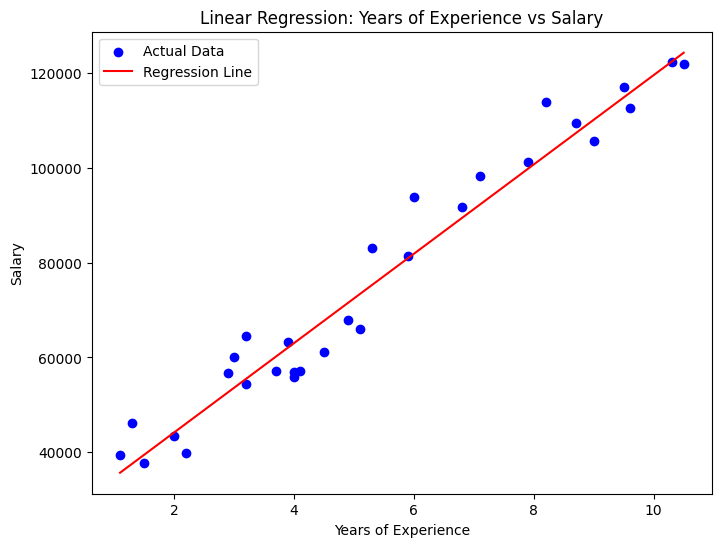

In [25]:
# Plot the original data and regression line
plt.figure(figsize=(8, 6))

# Scatter plot of actual data points
plt.scatter(X, y, color="blue", label="Actual Data")

# Regression line
plt.plot(X, model.predict(X), color="red", label="Regression Line")

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Years of Experience vs Salary")
plt.legend()
plt.show()
